In [17]:
import pandas as pd
import sqlite3 as db
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns

C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Connect to database, extract data to perform EDA on

In [11]:
path = "C:/Users/Anton/Documents/Anton_Gollbo/Skolarbete/projects/Hemnet_Housing/data"
try:
    conn = db.connect(f"{path}/hemnet_database.db")    
    c = conn.cursor()
except Exception as e:
    print(e)


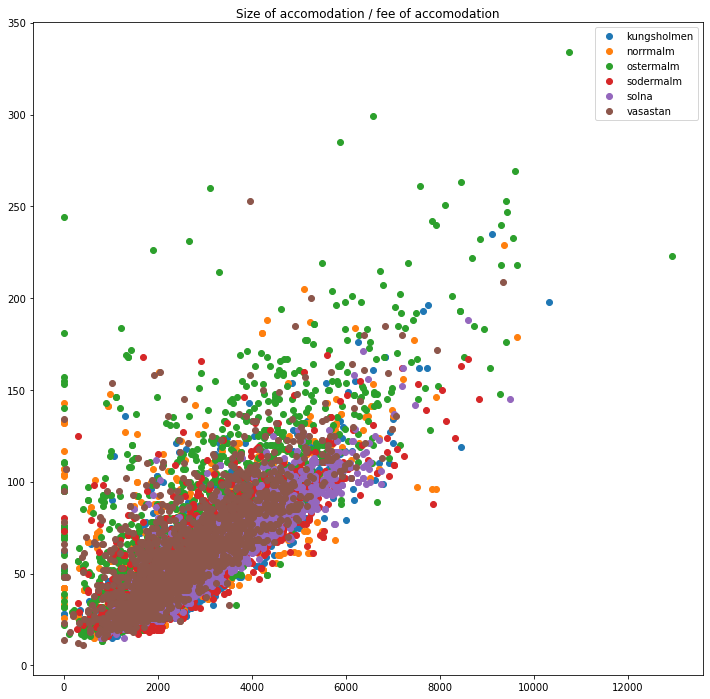

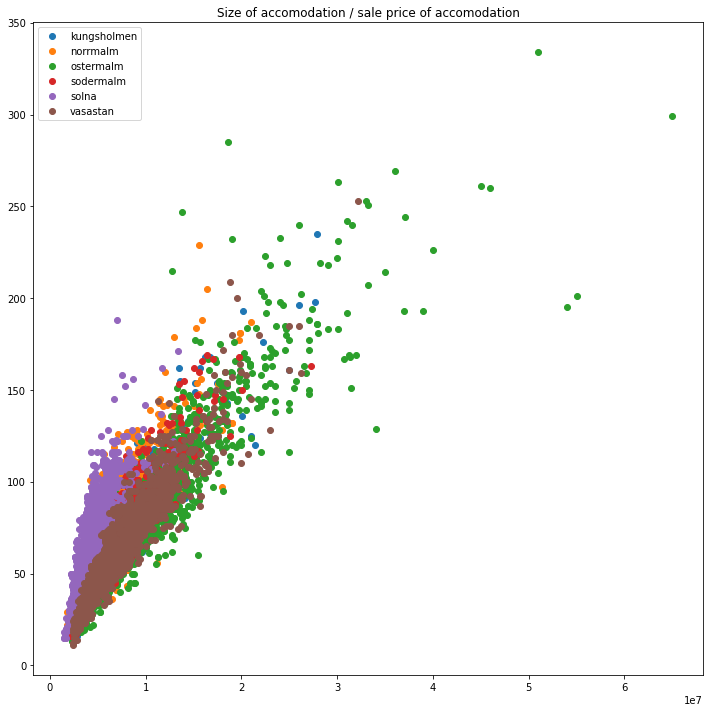

In [27]:
#Read data
data = pd.read_sql_query(f"SELECT * FROM housing_objects ", conn)
#Group data object by the different districts
groups = data.groupby("district")

#Scatter plot of size / fee 
plt.figure(figsize=(12,12))
for name, group in groups:
    plt.plot(group["fee"], group["size"], marker="o", linestyle="", label=name)
plt.legend()
plt.title("Size of accomodation / fee of accomodation")
plt.show()

#Scatter plot of size / final sale price
plt.figure(figsize=(12,12))
for name, group in groups:
    plt.plot(group["sale_price"], group["size"], marker="o", linestyle="", label=name)
plt.legend()
plt.title("Size of accomodation / sale price of accomodation")
plt.show()



# 1.1
## We want answers to the following questions
### - What neighborhood is the most expensive on average? (in terms of both fee and sale price)
Can the price be justified with features or NearbyPOIs?



In [30]:
df_fee_price = pd.read_sql_query("SELECT AVG(fee),AVG(sale_price),district  FROM housing_objects GROUP BY district", conn)
df_fee_price

df_features_POIs = pd.read_sql_query("SELECT AVG(NearbyPOIs),COUNT(features),district  FROM housing_objects GROUP BY district", conn)
df_features_POIs

,AVG(NearbyPOIs),COUNT(features),district
0,47.926270,1535,kungsholmen
1,182.967515,340,norrmalm
2,65.820923,1553,ostermalm
3,78.712293,1673,sodermalm
4,13.847789,1647,solna
5,79.988154,1763,vasastan


In [ ]:
df_songs_training.hist(figsize=(16,16), xrot=45)



In [18]:
df_district = pd.read_sql_query("SELECT fee, sale_price, district FROM housing_objects ", conn)

array([[<AxesSubplot:title={'center':'fee'}>,
        <AxesSubplot:title={'center':'sale_price'}>]], dtype=object)

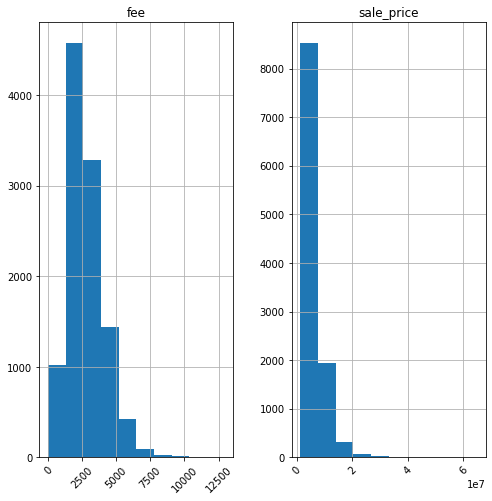

In [21]:
df_district.hist(figsize=(8,8), xrot=45)